### <font color='red'>Once I got the list of top 500 twitter accounts and their similarities ( using their last ~3200 tweets or all tweets of their lifetime, which ever is less ), I spent some ( read: lot of it ) time to MANUALLY get details of these accounts like is it account for a person/group of people OR is it account representing an organization/company. Next, where is the person/organization based at ? Also, what's the category of the account - is it for news ? is it by an actor ? is it by politician ? etc...</font>
#### For regions, we first find out countries along with also defining 'middleEast' consisting mostly of saudi arabia accounts. Then we also separate out any region with less than 10 accounts as 'other'
#### We also define different categories of accounts based on how many accounts we have for it - these turn out to be politics, music, actors, football, cricket, other sports, entertainers, etc!

In [1]:
import pickle
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as d
import os

In [2]:
def get_user_map():
    user_details = pd.read_csv( open('./top500accounts_details.csv', 'r') ).set_index('Name')
    with open('./twitter_user_tnse_result.pickle', 'rb') as f:
        raw_df = pd.DataFrame(pickle.load(f)).transpose()
    raw_df.columns = ["x", "y", "Name"]
    raw_df = raw_df.set_index('Name')
    return raw_df.join(user_details,on='Name',how='left')

In [3]:
user_to_categories = get_user_map()
user_to_categories.head()

,x,y,type,country,category,region
Name,,,,,,
BarackObama,8.66329,5.86945,celebrity,america,politics,america
justinbieber,7.86774,-2.70317,celebrity,canada,music,other
katyperry,-7.16408,-1.93872,celebrity,america,music,america
rihanna,11.3344,-3.81291,celebrity,barbados,music,other
taylorswift13,9.41919,-4.05103,celebrity,america,music,america


In [4]:
def plot( dataset, x_name, y_name, column, colors='tab10' ):
    plt.figure(figsize=(14,12))
    n_colors = len( list(set(user_to_categories[column])) )
    dataset['label'] = dataset[column]
    color_palette = sns.color_palette(n_colors=n_colors)
    if not ( colors == None ):
        color_palette = sns.color_palette(colors, n_colors=n_colors)
    sns.scatterplot(
        x= x_name, y= y_name, hue=column,
        palette=color_palette,
        data= dataset, legend="full")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 1. Twitter accounts : do they represent people or organization ?

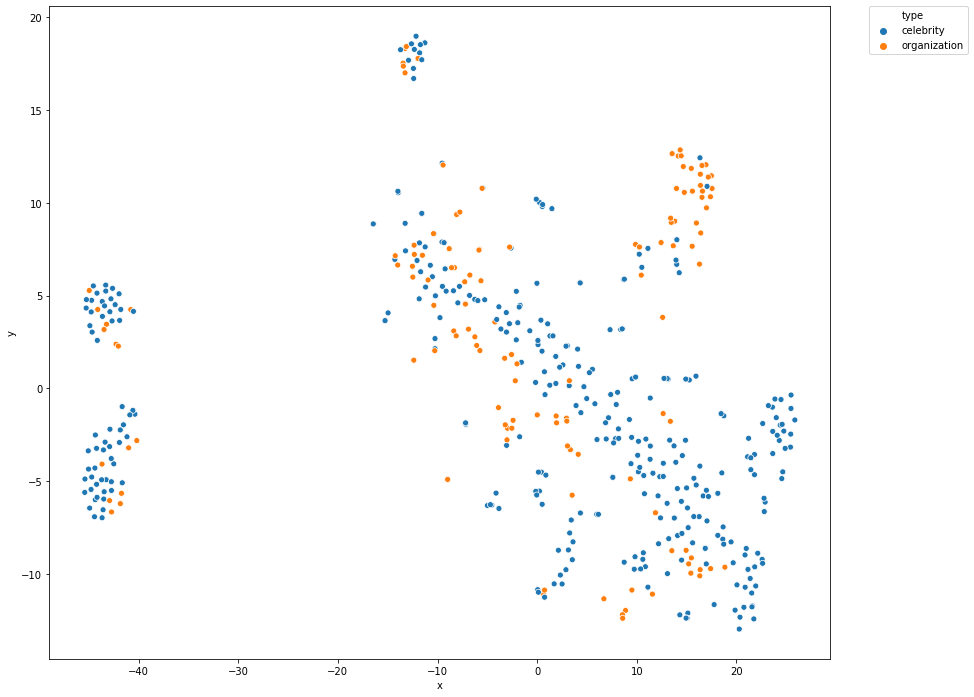

In [5]:
plot(user_to_categories, 'x', 'y', 'type'  )

#### Looking at it, we can say majority of the accounts are of celebrities, and not of the organizations. Only major cluster of organizations we see is at top right - closely looking, those are accounts of american news channels! 'People' accounts near it are the ones of president of america, first lady, etc! Exciting!

### 2. Twitter accounts : which geographical regions do they represent 

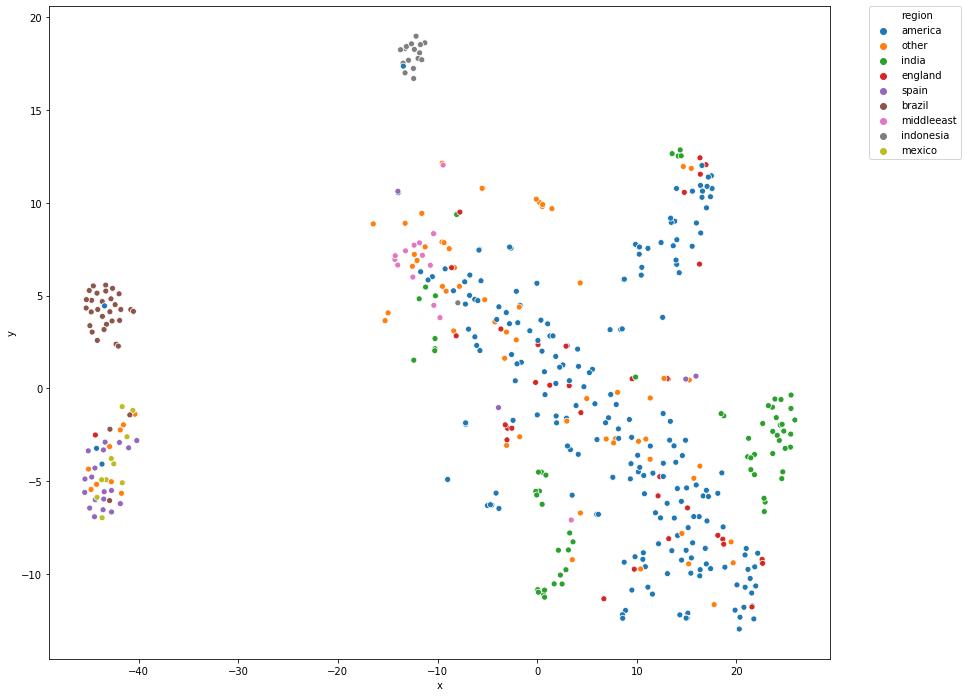

In [6]:
plot(user_to_categories, 'x', 'y', 'region' )

#### We see that most of top 500 followed accounts are from america. We see roughly two clusters ( on based of similarities ) of Indian accounts - closely looking, left one is majorly indian politicians and right one is majorly indian actors! Exciting again!<br>We also see cluster of brazil accounts on the left and cluster of indonesian accounts on the top. This can be attributed to the languages used in the tweets of these accounts, thus the 'words' being pretty different from common english words.<br>This logic can also be used to explain the cluster on left bottom - which has accounts from spain, mexico and other countries

### 3. Twitter accounts : which category do the accounts belong to

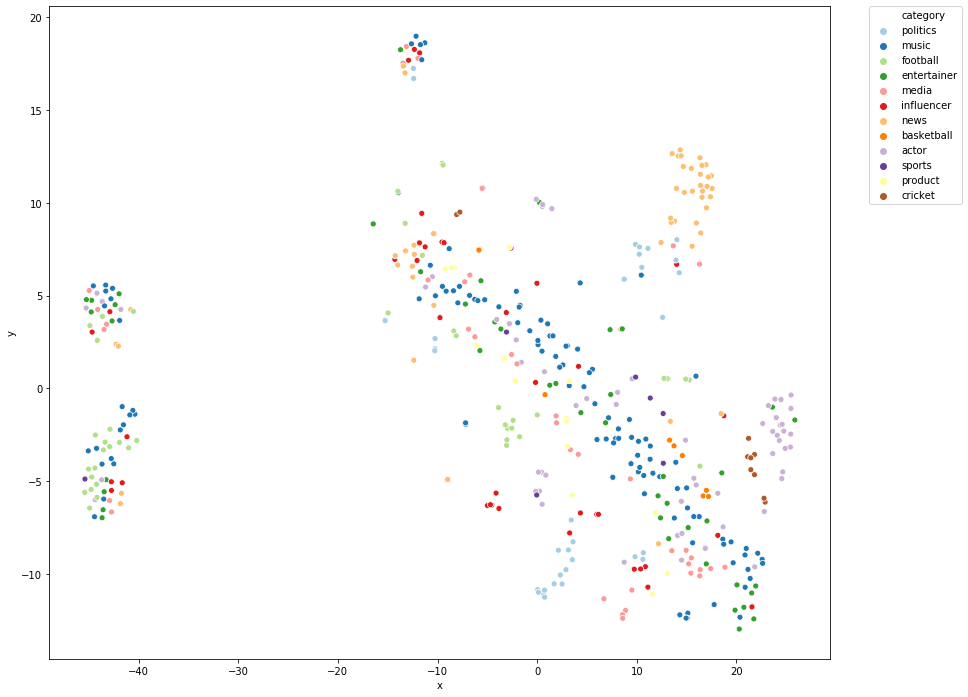

In [7]:
plot(user_to_categories, 'x', 'y', 'category', 'Paired' )

#### Okay in this map, we see clusters of indian actors, indian political accounts and news accounts - as we saw before. We also see spread of music ( singers or bands ) accounts around the region of english speaking accounts. We also can see that most of them are american singers. We do see that majority of accounts of celebrities ( people ) and majority of them are of musicians indeed. This is something you would notice if you painfully manually update the details of top 500 followed twitter accounts.

### <font color='red'>I did another analysis using only last 500 tweets of each user - and we get very similar similarities! This can be very well explained by reasoning that for most of the users we have around 3000 tweets - so if we get last 500 tweet, that don't make much difference. Also the fact that some clusters have different languages too!</font>

#### Let's also check whether frequency of tweets for following groups are similar or not : indian actors and american news channel

In [8]:
def getFrequencyOfUser( user ):
    BASE_PATH = './tweets'
    PARSE_TIME_FORMAT = '%Y-%m-%d %H:%M:%S'
    user_file = os.path.join( BASE_PATH, user + '_tweets.csv' )
    try:
        csv_reader = csv.reader( open( user_file, 'r' ) )
        next(csv_reader, None)  # skip the headers
        min_date = max_date = None
        total_tweets = 0
        first_row = last_row = None
        for row in csv_reader:
            if first_row == None:
                first_row = row
            last_row = row
            total_tweets = total_tweets + 1

        max_time = d.datetime.strptime( first_row[1], PARSE_TIME_FORMAT )
        min_time = d.datetime.strptime( last_row[1] , PARSE_TIME_FORMAT )
        time_diff = (max_time - min_time).days
        return total_tweets/time_diff
    except:
        return []

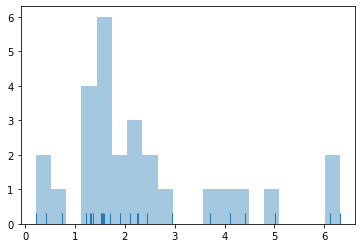

In [9]:
indians = user_to_categories[ user_to_categories['region'] == 'india' ]
indian_actors = indians[ indians['category'] == 'actor'].index.values.tolist()
freq = [ getFrequencyOfUser(actor) for actor in indian_actors ]
sns.distplot(freq, bins=20, kde=False, rug=True);

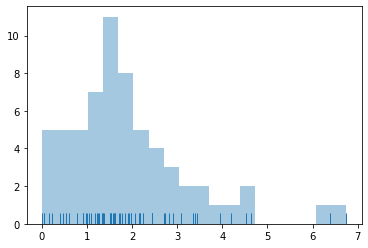

In [10]:
americans = user_to_categories[ user_to_categories['region'] == 'america' ]
american_singers = americans[ americans['category'] == 'music'].index.values.tolist()
freq = [ getFrequencyOfUser(singer) for singer in american_singers ]
sns.distplot(freq, bins=20, kde=False, rug=True);

### Well, they are not!